In [2]:
%run util.py

## ODE System

Consider the ODE

$$
x'' = x - x^2
$$

which can be written as system

$$
\begin{align*}
x' &= y \\
y' &= x - x^2\\
\end{align*}
$$

Fixed points are located at $(0,0), (1, 0)$

This is a conservative system as it is of the form $x'' = F(x)$. The *potential energy* $V(x)$ is defined by $F(x) = -dV(x) / dx$ and is in our case

$$
V(x) = - \frac{x^2}{2} + \frac{x^3}{3} + C
$$

Then the *total energy* $E$ is given by

$$
E = \frac{1}{2} x'^2 + V(x) = \frac{1}{2} y^2 - \frac{x^2}{2} + \frac{x^3}{3} + C
$$

In [5]:
def dX_dt(X, t=0):
    return np.array([X[1],
                     X[0] - X[0]**2])

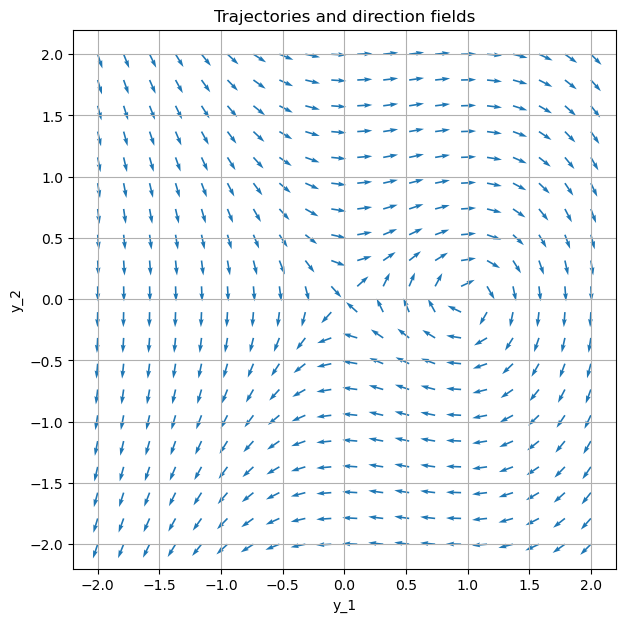

In [6]:
vField(-2, 2, -2, 2, dX_dt, Norm = True)

## Jacboi Matrix

$$
J = \begin{pmatrix} 0 & 1 \\ 1-2x & 0\end{pmatrix}
$$

J at $(0,0)$:

$$
J = \begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix}
$$

J at $(1,0)$

$$
J = \begin{pmatrix} 0 & 1 \\ -1 & 0\end{pmatrix}
$$


In [8]:
# (0,0)
J = np.array([[0, 1],[1,0]])
lin.eig(J)

(array([ 1.+0.j, -1.+0.j]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [9]:
# (1,0)
J = np.array([[0, 1],[-1,0]])
lin.eig(J)

(array([0.+1.j, 0.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        +0.70710678j, 0.        -0.70710678j]]))

In [27]:
tmax = 20
t = np.linspace(0, tmax, 200)
X, infodict = solveODE(dX_dt, [1.0, 0.1], t)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$y$')

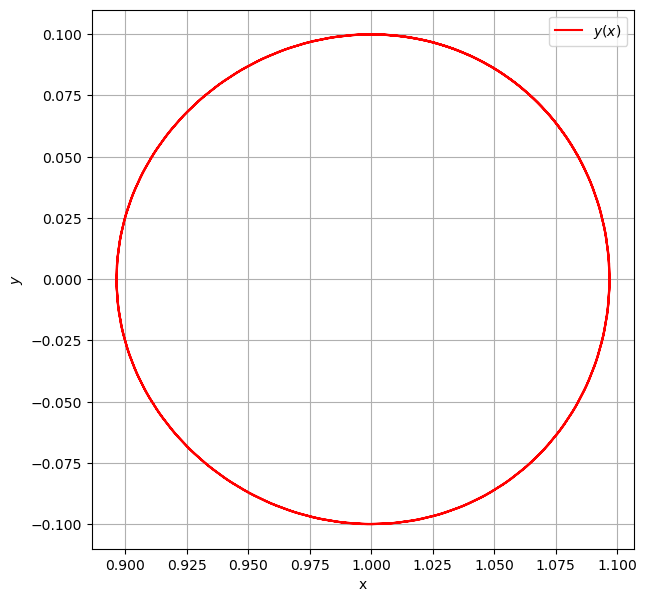

In [28]:
x, y = X.T

plt.plot(x, y, 'r-', label='$y(x)$')

plt.grid()
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('$y$')

Below we plot the contours of constant energy. It's a bit tricky to get the energy values "right" (the integration constant $C$ above can also be negative), but the plot below shows the constant energy contours around the fixed point at $(1,0)$.

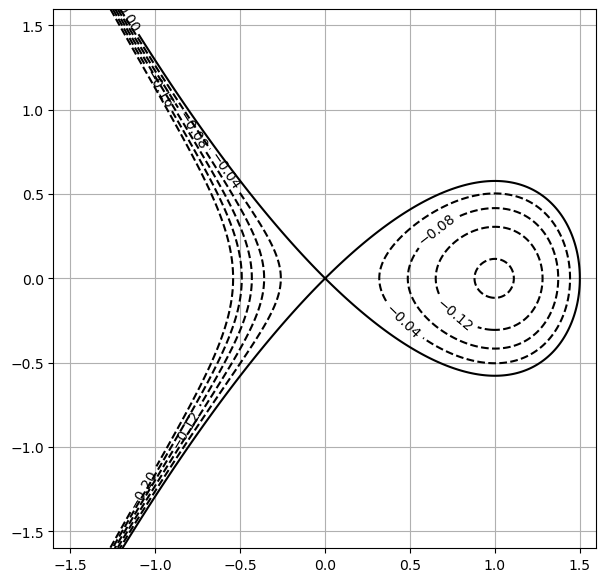

In [60]:
delta = 0.005
mx = 1.6
x = np.arange(-mx, mx, delta)
y = np.arange(-mx, mx, delta)
X, Y = np.meshgrid(x, y)

Z = 0.5*Y**2 - 0.5*X**2 + 1/3.*X**3

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.linspace(-0.2, 0, 6), colors='k')
# CS = ax.contour(X, Y, Z, [-0.01,0,0.01], colors='k')
ax.clabel(CS, inline=True)
ax.grid(True)